<h1>Poker Project</h1>

<h4>This data was taken from UCI's repository. It contains dealt hands and classifies winning hands.</h4>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

print('pandas version is {}.'.format(pd.__version__))
print('numpy version is {}.'.format(np.__version__))
print('scikit-learn version is {}.'.format(sklearn.__version__))
print('seaborn version is {}.'.format(sns.__version__))
print('matplotlib version is {}.'.format(matplotlib.__version__))

pandas version is 0.24.2.
numpy version is 1.16.5.
scikit-learn version is 0.20.3.
seaborn version is 0.9.0.
matplotlib version is 2.2.4.


In [2]:
training = pd.read_csv("poker-hand-training-true.data", names = range(0,11))
print("This set has {} data points and {} features.".format(*training.shape))

This set has 25010 data points and 11 features.


In [3]:
testing = pd.read_csv("poker-hand-testing.data", names = range(0,11))
print("This set has {} data points and {} features.".format(*testing.shape))

This set has 1000000 data points and 11 features.


<h4>Exploring the Data</h4>

In [4]:
display(training)

,0,1,2,3,4,5,6,7,8,9,10
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [5]:
display(testing)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,3,1,1,12,2,9,4,9,2,6,1
999996,3,3,4,5,2,7,1,4,4,3,1
999997,1,11,4,7,3,9,1,13,2,7,1
999998,3,11,1,8,1,1,3,13,2,8,1


<h4>Counting occurences for each output</h4>

In [6]:
count = {}
for i in training[10]:
    if str(i) not in count:
        count[str(i)] = 1
    else:
        count[str(i)] += 1
print(count)
sum = 0
for i in count:
    sum += count[i]
print(sum)
for i in count:
    print(str(i) + ": "+ str(count[i] / float(sum) * 100) + "%")

{'1': 10599, '0': 12493, '3': 513, '2': 1206, '5': 54, '4': 93, '7': 6, '6': 36, '9': 5, '8': 5}
25010
1: 42.3790483806%
0: 49.9520191923%
3: 2.05117952819%
2: 4.82207117153%
5: 0.215913634546%
4: 0.371851259496%
7: 0.0239904038385%
6: 0.143942423031%
9: 0.0199920031987%
8: 0.0199920031987%


In [7]:
count = {}
percent_errors = {}
for i in testing[10]:
    if str(i) not in count:
        count[str(i)] = 1
    else:
        count[str(i)] += 1
print(count)
sum = 0
for i in count:
    sum += count[i]
print(sum)
for i in count:
    print(str(i) + ": "+ str(count[i] / float(sum) * 100) + "%")
    percent_errors[str(i)] = count[i] / float(sum)

{'1': 422498, '0': 501209, '3': 21121, '2': 47622, '5': 1996, '4': 3885, '7': 230, '6': 1424, '9': 3, '8': 12}
1000000
1: 42.2498%
0: 50.1209%
3: 2.1121%
2: 4.7622%
5: 0.1996%
4: 0.3885%
7: 0.023%
6: 0.1424%
9: 0.0003%
8: 0.0012%


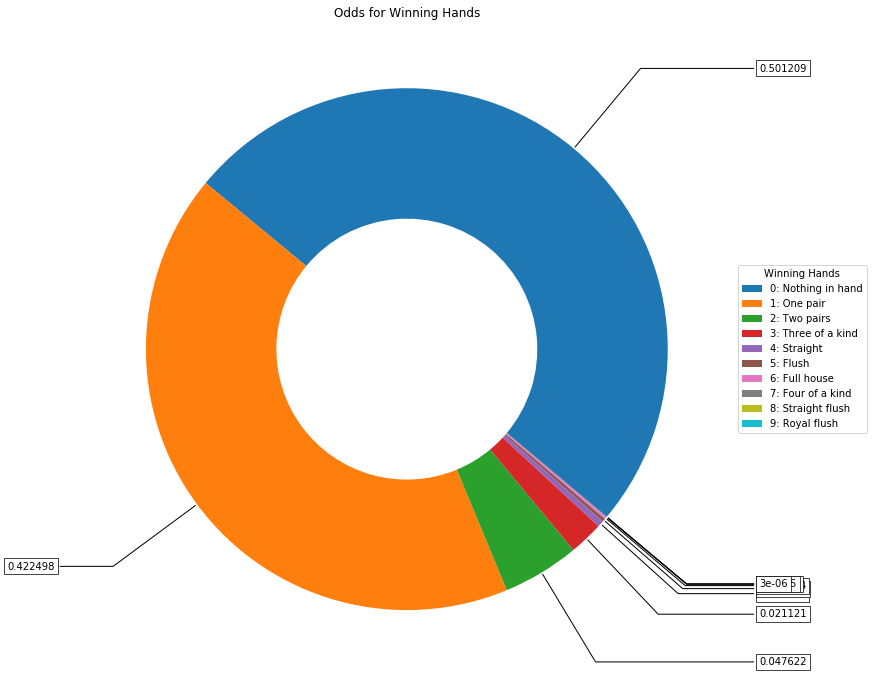

In [8]:
fig, ax = plt.subplots(figsize=(24, 12), subplot_kw=dict(aspect="equal"))

winning_hands = [percent_errors[str(i)] for i in range(0, 10)]

data = ['0: Nothing in hand', '1: One pair', '2: Two pairs', '3: Three of a kind','4: Straight',
        '5: Flush', '6: Full house', '7: Four of a kind', '8: Straight flush', '9: Royal flush']

wedges, texts = ax.pie(winning_hands, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(winning_hands[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Odds for Winning Hands")

ax.legend(wedges, data,
          title="Winning Hands",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()